In [1]:
%config IPCompleter.greedy=True
import numpy as np
import h5py
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Model, Input
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
#from sklearn.model_selection import KFold, GridSearchCV
from sklearn.neural_network import MLPClassifier

Using TensorFlow backend.


Execution Environment: This notebook has been executed in Azure ML Compute with Python 3.6 and TF:

In [2]:
print(tf.__version__)

2.1.0


# Deep Learning - Assignement 2 - Part B - i

#### R00183247 - Adam Zebrowski

Use a pre-trained CNN model (such as VGG or Inception models) as a feature extractor and pair its output with a secondary (standard) machine learning algorithm. For example, you could use a pretrained VGG16 network as a feature extractor and feed the extracted feature data into a logistic regression model. What is the impact on the validation and training accuracy values?

In [3]:
#Load assignment dataset, as per provided code
def loadDataH5():
    with h5py.File('data/data1.h5','r') as hf: 
        trainX = np.array(hf.get('trainX')) 
        trainY = np.array(hf.get('trainY')) 
        valX = np.array(hf.get('valX')) 
        valY = np.array(hf.get('valY')) 
        print (trainX.shape,trainY.shape) 
        print (valX.shape,valY.shape)
    return trainX, trainY, valX, valY
trainX, trainY, testX, testY = loadDataH5()

(1020, 128, 128, 3) (1020,)
(340, 128, 128, 3) (340,)


In [4]:

WIDTH = trainX.shape[2]
HEIGHT = trainX.shape[1]
DEPTH = trainX.shape[3]

CLASSES = 17
BATCH_SIZE = 32

In [5]:
#Function to visualise the output from accuracies aggregation
#Reference: Matplotlib documentation
def visualiseaccuracies(data, title, figSize = (10, 5)):
    labels = data[:,0]
    x = np.arange(len(labels))  # the label locations
    width = 0.55  # the width of the bars

    fig, ax = plt.subplots(figsize=figSize)
    rects1 = ax.bar(x, data[:,1].astype(float), width)


    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Accuracy')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)



    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{:.3f}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(rects1)

    fig.tight_layout()

    plt.show()

In [6]:
#Input shape of the data (128, 128, 3)
inputShape = (HEIGHT, WIDTH, DEPTH)
#Will not include top
includeTop = False
#Model to be evaluated, I have taken most of those available in Keras Applications
#This will serve me as well to narrow down the initial selection for tuning for part B-ii
models = [[tf.keras.applications.Xception(weights='imagenet', include_top=includeTop, input_shape=inputShape), "Xcept"],   
          [tf.keras.applications.VGG16(weights='imagenet', include_top=includeTop, input_shape=inputShape), "VGG16"],
          [tf.keras.applications.VGG19(weights='imagenet', include_top=includeTop, input_shape=inputShape), "VGG19"],
          [tf.keras.applications.ResNet50(weights='imagenet', include_top=includeTop, input_shape=inputShape), "RN50"],
          [tf.keras.applications.ResNet152(weights='imagenet', include_top=includeTop, input_shape=inputShape), "RN152"],
          [tf.keras.applications.ResNet50V2(weights='imagenet', include_top=includeTop, input_shape=inputShape), "RN50V2"],
          [tf.keras.applications.ResNet101V2(weights='imagenet', include_top=includeTop, input_shape=inputShape), "RN101V2"],
          [tf.keras.applications.ResNet152V2(weights='imagenet', include_top=includeTop, input_shape=inputShape), "RN152V2"],
          [tf.keras.applications.InceptionV3(weights='imagenet', include_top=includeTop, input_shape=inputShape), "IncV3"],
          [tf.keras.applications.InceptionResNetV2(weights='imagenet', include_top=includeTop, input_shape=inputShape), "IRNV2"],
          [tf.keras.applications.MobileNet(weights='imagenet', include_top=includeTop, input_shape=inputShape), "MNet"],
          [tf.keras.applications.MobileNetV2(weights='imagenet', include_top=includeTop, input_shape=inputShape), "MNetV2"],
          [tf.keras.applications.DenseNet121(weights='imagenet', include_top=includeTop, input_shape=inputShape), "DNet121"],
          [tf.keras.applications.DenseNet169(weights='imagenet', include_top=includeTop, input_shape=inputShape), "DNet169"],
          [tf.keras.applications.DenseNet201(weights='imagenet', include_top=includeTop, input_shape=inputShape), "DNet201"]]

In [7]:
''' 
Standard models'to be executed after the CNNs to evaluate feature extraction
The models are:
    1. Logistic Regression
    2. Random Forest
    3. Decision Trees
    4. KNN
    3. SVM
'''
classicModels = {
    "LR" : LogisticRegression(solver= "lbfgs", multi_class="multinomial", C=0.1, max_iter=10000 ),
    "RF": RandomForestClassifier(n_estimators=250, random_state=0),
    "DT": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(n_neighbors=15),
    "SVM": SVC(gamma='auto')
}

Processing Xcept: 

Results for LR and Xcept: 0.8206
Results for RF and Xcept: 0.7853
Results for DT and Xcept: 0.4794
Results for KNN and Xcept: 0.6412
Results for SVM and Xcept: 0.7176


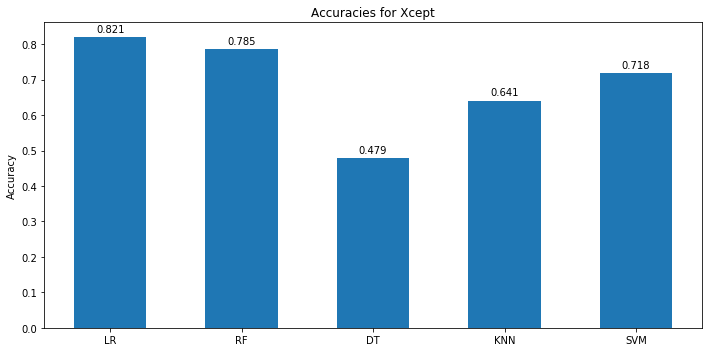

########################################## 

Processing VGG16: 

Results for LR and VGG16: 0.8706
Results for RF and VGG16: 0.8324
Results for DT and VGG16: 0.4765
Results for KNN and VGG16: 0.6471
Results for SVM and VGG16: 0.7618


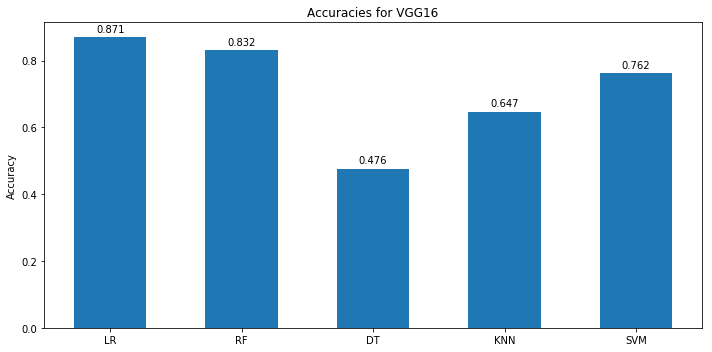

########################################## 

Processing VGG19: 

Results for LR and VGG19: 0.8618
Results for RF and VGG19: 0.8176
Results for DT and VGG19: 0.4235
Results for KNN and VGG19: 0.6647
Results for SVM and VGG19: 0.7029


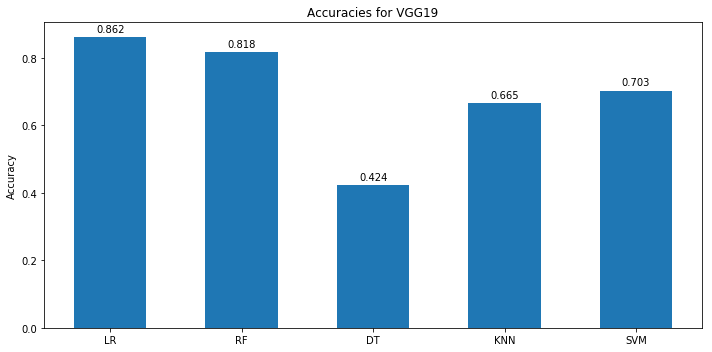

########################################## 

Processing RN50: 

Results for LR and RN50: 0.5471
Results for RF and RN50: 0.4588
Results for DT and RN50: 0.2618
Results for KNN and RN50: 0.3029
Results for SVM and RN50: 0.0441


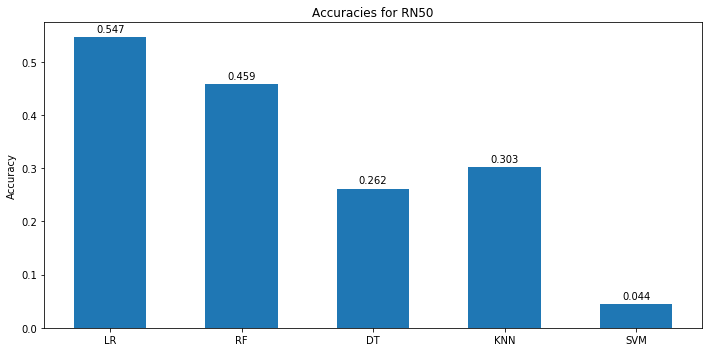

########################################## 

Processing RN152: 

Results for LR and RN152: 0.4794
Results for RF and RN152: 0.3971
Results for DT and RN152: 0.2206
Results for KNN and RN152: 0.2176
Results for SVM and RN152: 0.0441


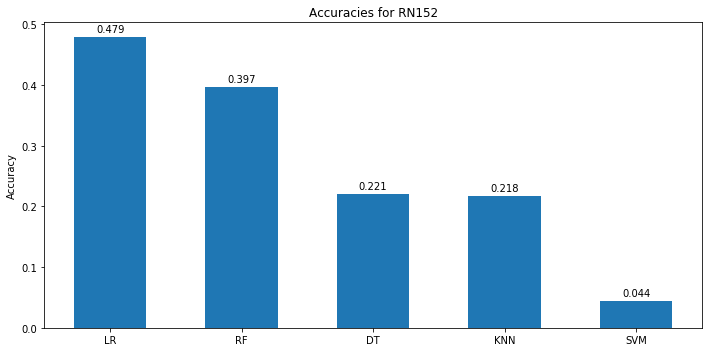

########################################## 

Processing RN50V2: 

Results for LR and RN50V2: 0.9059
Results for RF and RN50V2: 0.8382
Results for DT and RN50V2: 0.5029
Results for KNN and RN50V2: 0.6471
Results for SVM and RN50V2: 0.7088


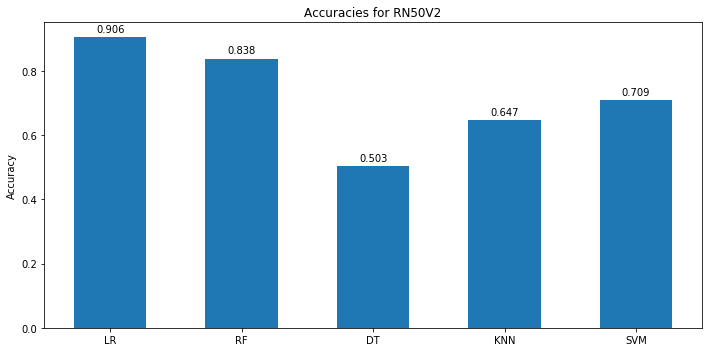

########################################## 

Processing RN101V2: 

Results for LR and RN101V2: 0.8706
Results for RF and RN101V2: 0.8353
Results for DT and RN101V2: 0.4735
Results for KNN and RN101V2: 0.6294
Results for SVM and RN101V2: 0.7088


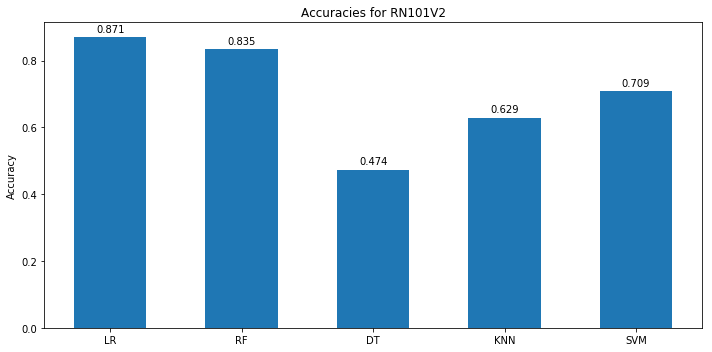

########################################## 

Processing RN152V2: 

Results for LR and RN152V2: 0.8676
Results for RF and RN152V2: 0.8029
Results for DT and RN152V2: 0.4559
Results for KNN and RN152V2: 0.5353
Results for SVM and RN152V2: 0.7088


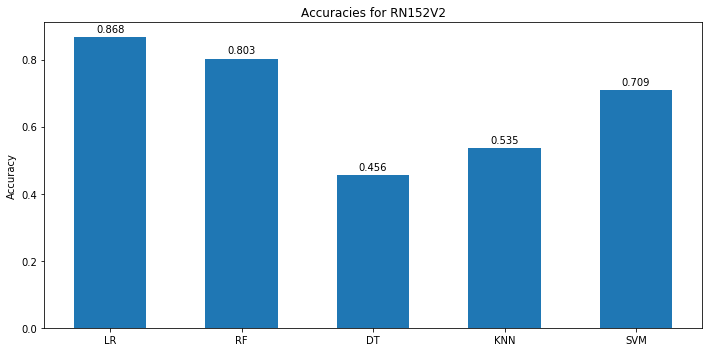

########################################## 

Processing IncV3: 

Results for LR and IncV3: 0.8471
Results for RF and IncV3: 0.8118
Results for DT and IncV3: 0.4588
Results for KNN and IncV3: 0.6529
Results for SVM and IncV3: 0.8088


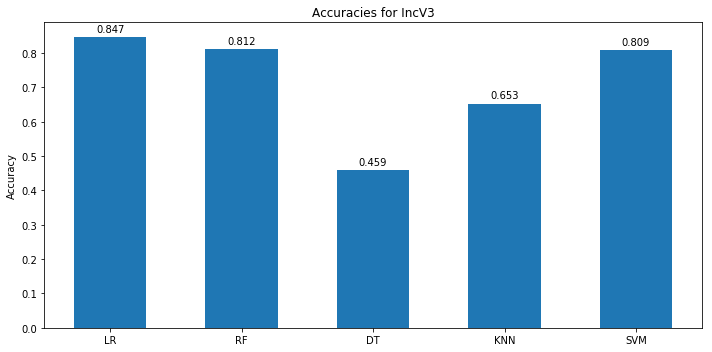

########################################## 

Processing IRNV2: 

Results for LR and IRNV2: 0.8912
Results for RF and IRNV2: 0.8206
Results for DT and IRNV2: 0.5029
Results for KNN and IRNV2: 0.6647
Results for SVM and IRNV2: 0.7824


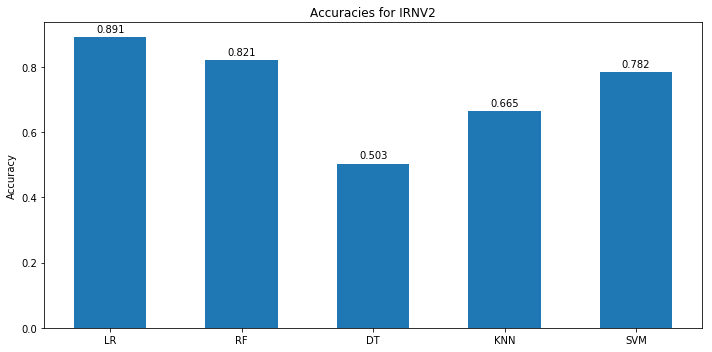

########################################## 

Processing MNet: 

Results for LR and MNet: 0.9441
Results for RF and MNet: 0.9176
Results for DT and MNet: 0.5265
Results for KNN and MNet: 0.8147
Results for SVM and MNet: 0.9059


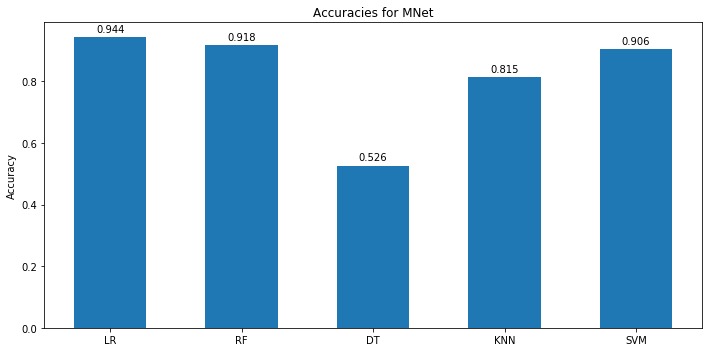

########################################## 

Processing MNetV2: 

Results for LR and MNetV2: 0.9294
Results for RF and MNetV2: 0.8765
Results for DT and MNetV2: 0.4412
Results for KNN and MNetV2: 0.7471
Results for SVM and MNetV2: 0.9147


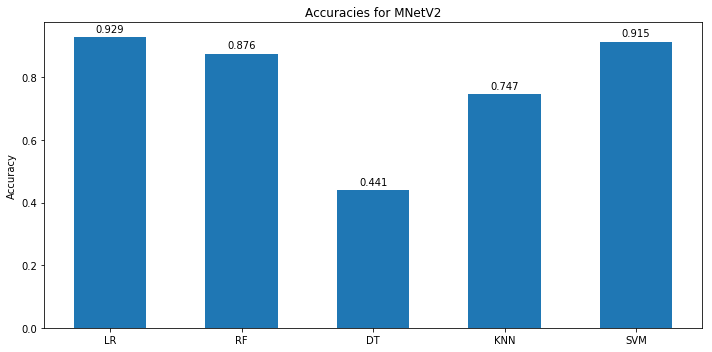

########################################## 

Processing DNet121: 

Results for LR and DNet121: 0.9265
Results for RF and DNet121: 0.8912
Results for DT and DNet121: 0.5500
Results for KNN and DNet121: 0.7441
Results for SVM and DNet121: 0.9000


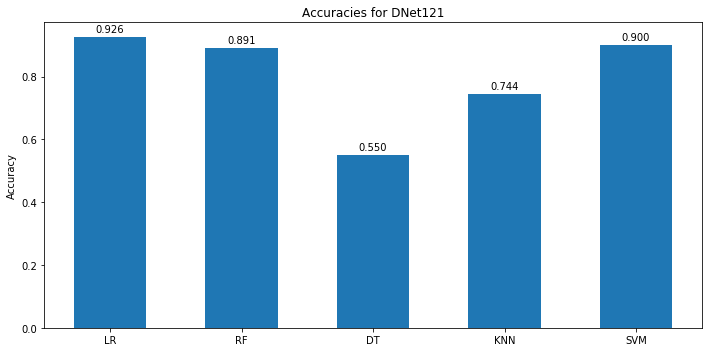

########################################## 

Processing DNet169: 

Results for LR and DNet169: 0.9265
Results for RF and DNet169: 0.8853
Results for DT and DNet169: 0.5265
Results for KNN and DNet169: 0.7471
Results for SVM and DNet169: 0.8941


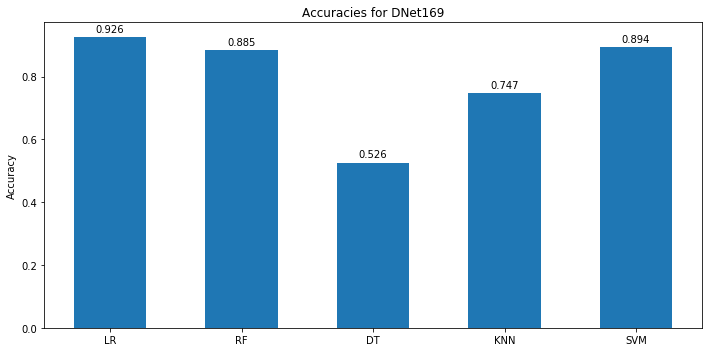

########################################## 

Processing DNet201: 

Results for LR and DNet201: 0.9088
Results for RF and DNet201: 0.8882
Results for DT and DNet201: 0.5676
Results for KNN and DNet201: 0.7471
Results for SVM and DNet201: 0.9000


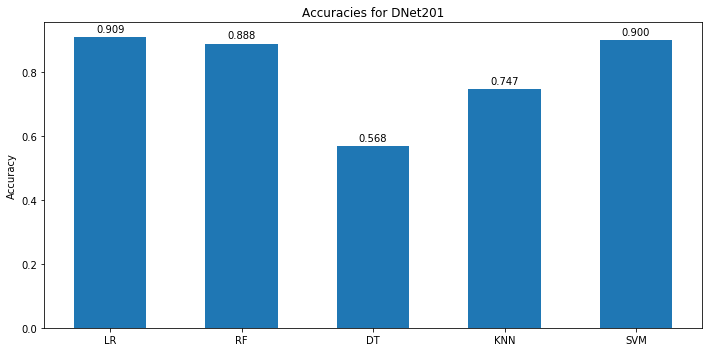

########################################## 



In [8]:
accuracies = []
#Loop throguh CNNs ans standard models to evaluate accuracies
for model in models:
    print("Processing {}: \n".format(model[1]))
    #Predict CNN
    featuresTrain = model[0].predict(trainX, batch_size=BATCH_SIZE)
    #Flaten for use in standard model
    featuresTrain = featuresTrain.reshape(featuresTrain.shape[0], -1)
    featuresTest = model[0].predict(testX, batch_size=BATCH_SIZE)
    featuresVal = featuresTest.reshape(featuresTest.shape[0], -1)
    scores = []
    #Loop for all standard models
    for cn, cm in classicModels.items():
        cm.fit(featuresTrain, trainY)
        #evaluate the model
        results = cm.predict(featuresVal)
        accuracyScore = metrics.accuracy_score(results, testY)
        #Capture scores
        scores.append([cn, accuracyScore])
        print ("Results for {} and {}: {:.4f}".format(cn, model[1], accuracyScore))
    
    scores = np.asarray(scores)
    visualiseaccuracies(scores, "Accuracies for {}".format(model[1]))
    maxIndex = np.argmax(scores[:,1].astype(float))
    label = "{},\n{}".format(model[1], scores[maxIndex,0])
    accuracies.append( [label ,scores[maxIndex,1]])
    print("########################################## \n")
    

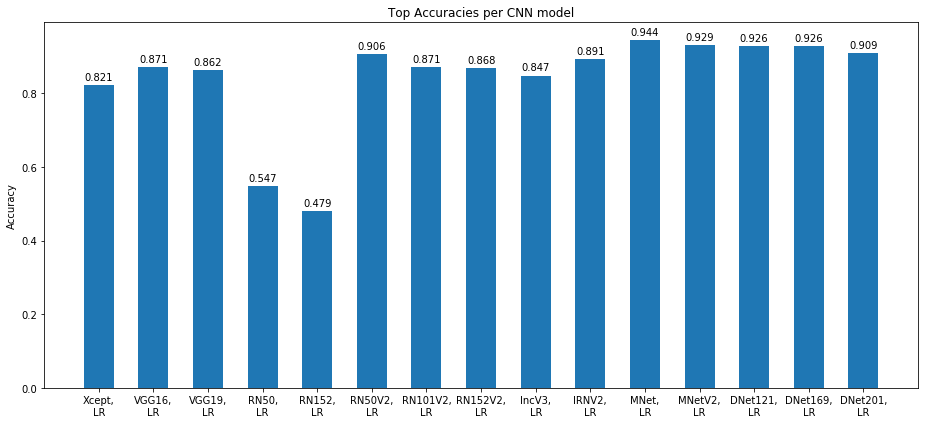

In [15]:
#Visualise top standard model per CNN executed
visualiseaccuracies(np.asarray(accuracies), "Top Accuracies per CNN model", (13, 6))